In [ ]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import initializers

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                48        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
model summary...: None
(1000, 2)
(2,)
(1000,)


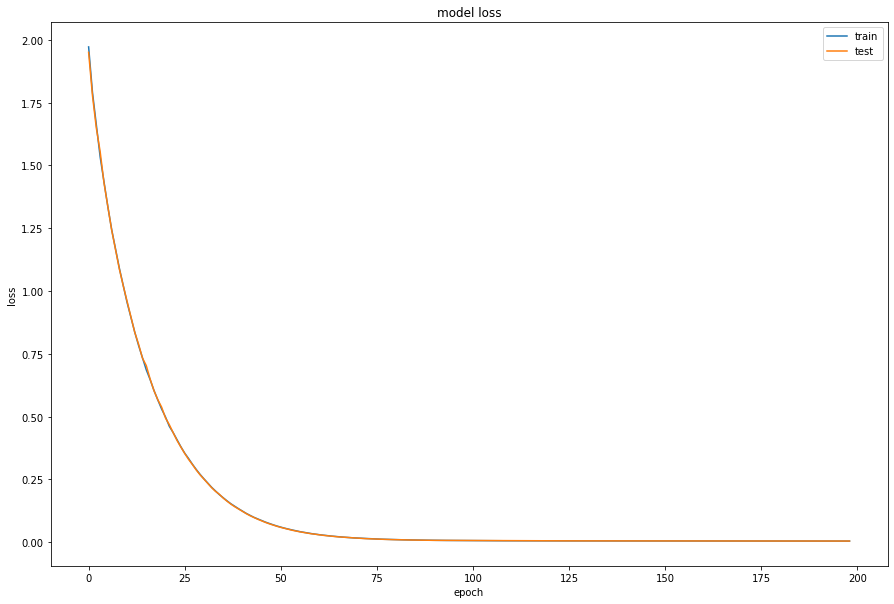

train loss... :  0.004870958160609007
val loss... :  0.005009923595935106
y actual value =  11.3
y predict value =  11.213516


In [ ]:
# equation
# y = 3*x1 + 5*x2 + 10

# model
def gen_senquential_model():

    model = Sequential([
                        Input(2, name='input_layer'),  # input 변수 2개
                        Dense(16, activation='sigmoid', name='hidden_layer1', 
                              kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.05, seed=42)),  # hidden node 16개
                        Dense(1, activation='relu', name='output_layer',
                              kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.05, seed=42))  # output layer
    ])

    print('model summary...:',model.summary())
    model.compile(optimizer='sgd', loss = 'mse')

    return model


def gen_linear_regression_dataset(samples=500, w1=3, w2=5, b=10):
    np.random.seed(0)
    X = np.random.rand(samples, 2)  # 2차원으로
    #print(X)
    print(X.shape)
    coef = np.array([w1, w2])
    bias = b

    #print(coef)
    print(coef.shape)

    y = np.matmul(X, coef.transpose()) + bias
    # for roop 없이 y 생성
    # X = (samples, 2), coef.T = (2,1)
    #print(y)
    print(y.shape)

    return X, y


def plot_loss_curve(history):
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(15,10))
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

def predict_new_sample(model, X, w1=3, w2=5, b=10):
    x = X.reshape(1,2)
    y_pred = model.predict(x)[0][0]

    y_actual = w1*x[0][0] + w2*x[0][1] + b

    print('y actual value = ', y_actual)
    print('y predict value = ', y_pred)


model = gen_senquential_model()
X, y = gen_linear_regression_dataset(1000)
history = model.fit(X,y, epochs=200, verbose=0, validation_split=0.3)

plot_loss_curve(history)

# loss
print('train loss... : ', history.history['loss'][-1])
print('val loss... : ', history.history['val_loss'][-1])

predict_new_sample(model, np.array([0.1, 0.2]))

In [ ]:
# weight - input
model.layers[0].get_weights()

[array([[0.5620471 , 0.46210784, 0.5664171 , 0.61236763, 0.45587283,
         0.46391797, 0.608768  , 0.59322506, 0.60775054, 0.6812642 ,
         0.59451616, 0.5682352 , 0.6458261 , 0.5750241 , 0.51915824,
         0.56703687],
        [1.0107172 , 0.9295027 , 1.0208973 , 1.0016364 , 1.0334466 ,
         0.8387516 , 0.9546905 , 0.9077153 , 0.9603325 , 0.9846789 ,
         0.8873506 , 0.9657524 , 0.93231976, 0.8674189 , 0.85950625,
         1.0109009 ]], dtype=float32),
 array([-0.4625693 , -0.31853563, -0.47698563, -0.49664742, -0.4026778 ,
        -0.2517846 , -0.44287798, -0.38370436, -0.44795975, -0.542269  ,
        -0.3652789 , -0.42177856, -0.4500157 , -0.33420303, -0.29467106,
        -0.4669662 ], dtype=float32)]

In [ ]:
# weight - hidden
model.layers[1].get_weights()

[array([[1.447785 ],
        [1.2044505],
        [1.4680952],
        [1.5126178],
        [1.3222477],
        [1.1025614],
        [1.4431206],
        [1.3582189],
        [1.4491835],
        [1.5982008],
        [1.3338784],
        [1.3974335],
        [1.4690704],
        [1.2814181],
        [1.1966726],
        [1.4555807]], dtype=float32), array([1.1477627], dtype=float32)]

실험시에는 weight 고정, 여기서는 정규분포로 고정시킴